### importing the libraries

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### installing word cloud

In [128]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### reading csv file

In [129]:
df = pd.read_csv('un-general-debates-blueprint.csv')

### reading 1st 20 rows

In [130]:
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


### sample fraction

In [131]:
df = df.sample(frac=0.2)

### defining data columns

In [132]:
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')

### defining data types

In [133]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
dtype: object

### defining data information

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1501 entries, 6067 to 1198
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       1501 non-null   int64 
 1   year          1501 non-null   int64 
 2   country       1501 non-null   object
 3   country_name  1501 non-null   object
 4   speaker       1497 non-null   object
 5   position      870 non-null    object
 6   text          1501 non-null   object
dtypes: int64(2), object(5)
memory usage: 93.8+ KB


### defining descriptive statistics for the data

In [135]:
df.describe()

,session,year
count,1501.000000,1501.000000
mean,49.037975,1994.037975
std,13.118202,13.118202
min,25.000000,1970.000000
25%,38.000000,1983.000000
50%,50.000000,1995.000000
75%,61.000000,2006.000000
max,70.000000,2015.000000


### defining length of speeches for text column

In [136]:
df['length'] = df['text'].str.len()
df.describe()

,session,year,length
count,1501.000000,1501.000000,1501.000000
mean,49.037975,1994.037975,18133.215190
std,13.118202,13.118202,7831.608932
min,25.000000,1970.000000,3377.000000
25%,38.000000,1983.000000,12212.000000
50%,50.000000,1995.000000,16761.000000
75%,61.000000,2006.000000,22508.000000
max,70.000000,2015.000000,60387.000000


In [137]:
df.describe(include='O')

,country,country_name,speaker,position,text
count,1501,1501,1497,870,1501
unique,198,198,1358,51,1501
top,PRY,Paraguay,Juan Manuel Santos Calderón,Minister for Foreign Affairs,“[We] will not enjoy development without secur...
freq,18,18,4,355,1


### finding out null values in the data set

In [138]:
df.isna().sum()

session           0
year              0
country           0
country_name      0
speaker           4
position        631
text              0
length            0
dtype: int64

### filling missing data

In [139]:
df['speaker'].fillna('unknown', inplace=True)
df['position'].fillna('unknown', inplace=True)
df.isna().sum()

session         0
year            0
country         0
country_name    0
speaker         0
position        0
text            0
length          0
dtype: int64

### changing string to upper case

In [140]:
df['speaker'] = df['speaker'].str.upper()
df['position'] = df['position'].str.upper()
df['text'] = df['text'].str.upper()

In [141]:
df[df['speaker'].str.contains('BUSH')]

,session,year,country,country_name,speaker,position,text,length
2720,44,1989,USA,United States,BUSH,PRESIDENT,﻿I AM HONOURED TO ADDRESS THE GENERAL ASSEMBLY...,19779
3207,47,1992,USA,United States,MR. GEORGE BUSH,PRESIDENT,"FORTY-SEVEN YEARS AGO I WAS A YOUNG MAN OF 21,...",21105


### drawing line plot

<Axes: >

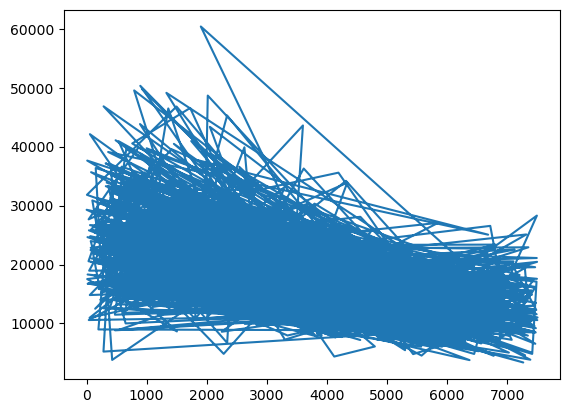

In [142]:
df['length'].plot()

### drawing box whisker plot

<Axes: >

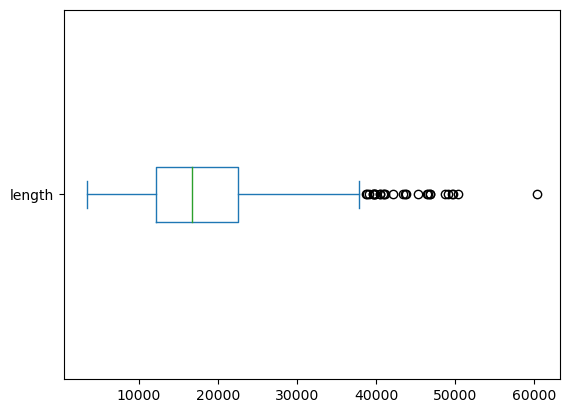

In [143]:
df['length'].plot(kind='box', vert=False)

### drawing histogram 

<Axes: ylabel='Frequency'>

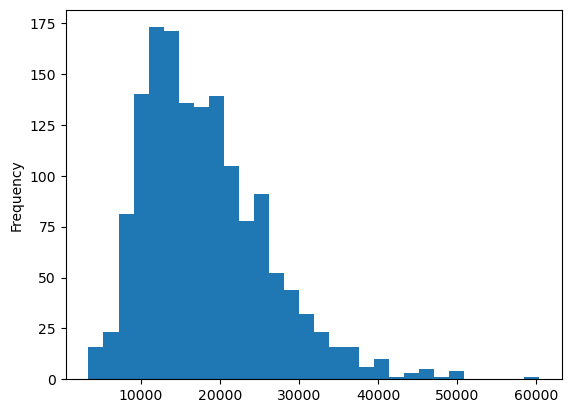

In [144]:
df['length'].plot(kind='hist', bins=30)

### drawing bar plot

/Users/killua/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


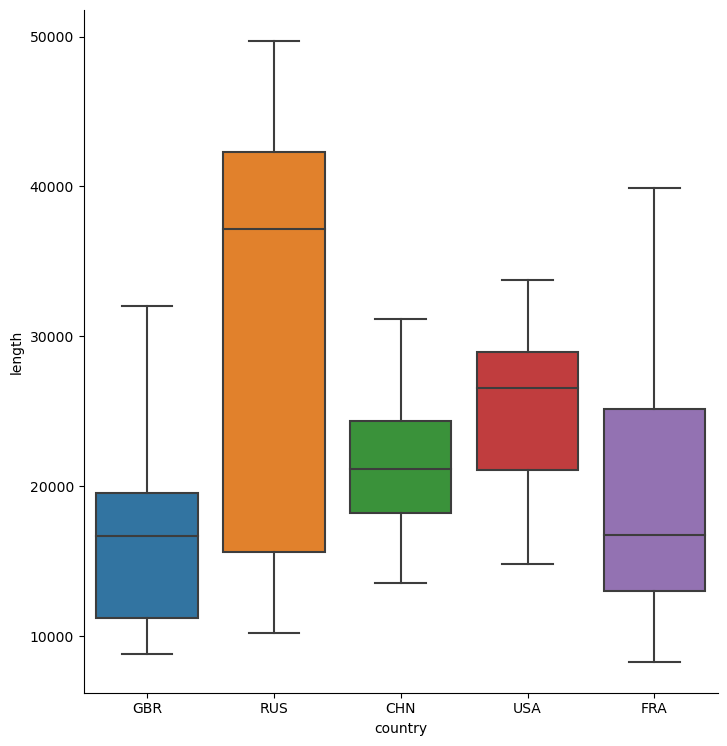

In [145]:
 where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
g = sns.catplot(data=df[where], x="country", y="length", kind='box')
g.fig.set_size_inches(8, 8)

### function to tokenize

In [146]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

### practising tokenization on practise text

In [147]:
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
testtokens = tokenize(testtext)
 
print(testtokens)

['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in', 'www', 'cdc', 'gov']


### removing stop words 

In [148]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'does', 'wasn', 'should', 'shan', 'down', 'from', 've', 'll', 'who', 'been', "it's", "that'll", 'needn', 'not', 'mightn', 'she', "weren't", 'our', 'more', "hadn't", 'so', 'in', 'same', 'am', 'but', 'those', 'why', 'out', "haven't", 'couldn', 'did', 'through', 'my', 'we', 'up', 'ourselves', 're', "should've", 'm', 'because', 'for', 'wouldn', 'hers', 'they', 'yourselves', 'don', "shouldn't", 'with', "needn't", 'whom', 'where', "couldn't", 'shouldn', 'both', 'what', 'won', 'aren', 'off', 'few', "you've", 'had', 'doesn', "won't", 'any', 'are', 'd', 'at', "shan't", 'him', 'before', 'as', "she's", "aren't", "mightn't", 'on', 's', 'do', 'her', 'most', 'me', 'himself', "isn't", 'y', 'all', 'than', "doesn't", 't', 'he', 'was', 'now', 'hadn', 'ma', 'then', 'o', 'here', 'over', "didn't", 'isn', 'between', 'can', 'of', 'will', 'hasn', 'again', 'and', 'how', 'other', 'these', 'this', 'having', "you'll", 'that', 'below', 'didn', 'is', 'being', "don't", 'an', 'there', "you'd", 'your', 'until', 'such

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/killua/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [149]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
#Just testing it
cleantokens= remove_stop(testtokens)
print(cleantokens)

['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


### creating pipeline

In [150]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

### running the pipeline

In [151]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

### counting the tokens

In [152]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
5014,58,2003,AFG,Afghanistan,HÂMID KARZAI,PRESIDENT,﻿THERE IS NO REALITY MORE\nOPPRESSIVE THAN THE...,10132,"[reality, oppressive, silence, nation, long, a...",837
7268,69,2014,RWA,Rwanda,PAUL KAGAME,PRESIDENT,"I WANT TO START BY CONGRATULATING \nYOU, SIR, ...",3377,"[want, start, congratulating, sir, election, p...",282
249,27,1972,KHM,Cambodia,MR. LONG BORET,UNKNOWN,"MR. PRESIDENT, MAY I AT THE OUTSET, ON BEHALF ...",22964,"[mr, president, may, outset, behalf, delegatio...",1834
3378,48,1993,TZA,"Tanzania, United Republic of",MR. RWEGASIRA,UNKNOWN,"I\nAM DELIGHTED TO EXTEND TO YOU, SIR, ON BEHA...",26365,"[delighted, extend, sir, behalf, tanzanian, de...",2191
1198,34,1979,NLD,Netherlands,DER KLAAUW,UNKNOWN,"﻿MR. PRESIDENT, AS MINISTER FOR FOREIGN AFFAIR...",24546,"[mr, president, minister, foreign, affairs, ki...",2058


### using the counter

In [153]:
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa.")

testcount= Counter(tokens)
print(testcount)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


### adding new data to the current count

In [154]:
more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens)
print(testcount)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


### counting 

In [155]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('nations', 25169), ('united', 24343), ('international', 23452), ('world', 18157), ('countries', 16955)]


### putting word freq in its own dataframe for analysis

In [156]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

### sort and display

In [157]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,25169
united,24343
international,23452
world,18157
countries,16955
peace,14566
states,12424
development,12312
people,12051


### descriptive statistics

In [158]:
freq_df.describe()

,freq
count,36493.000000
mean,61.383498
std,422.176409
min,1.000000
25%,1.000000
50%,3.000000
75%,15.000000
max,25169.000000


### drawing bar chart

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

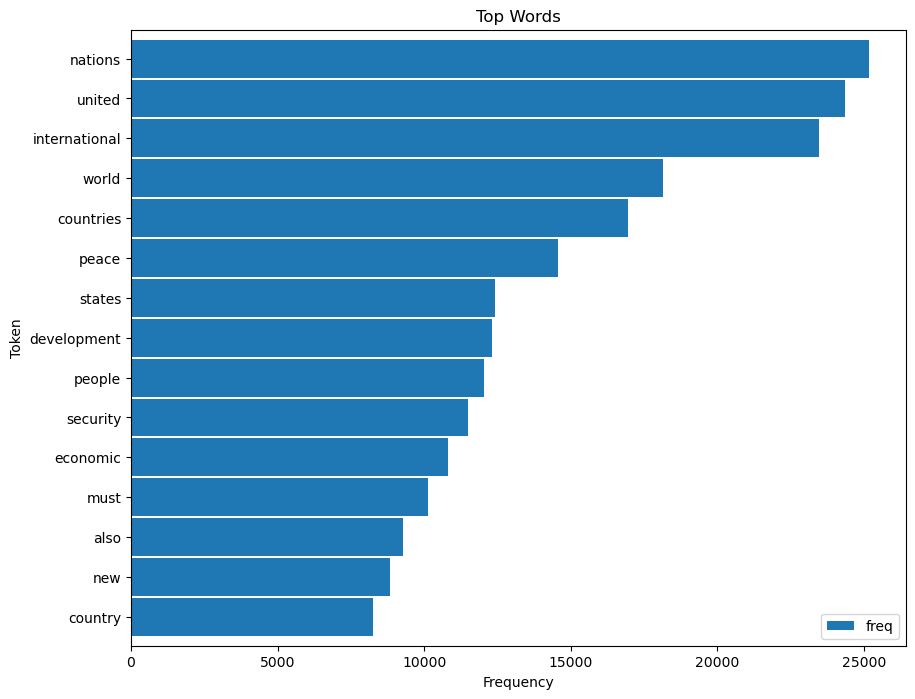

In [159]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(10,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

### importing word cloud

In [160]:
from wordcloud import WordCloud

### ploting word cloud for data

(-0.5, 399.5, 199.5, -0.5)

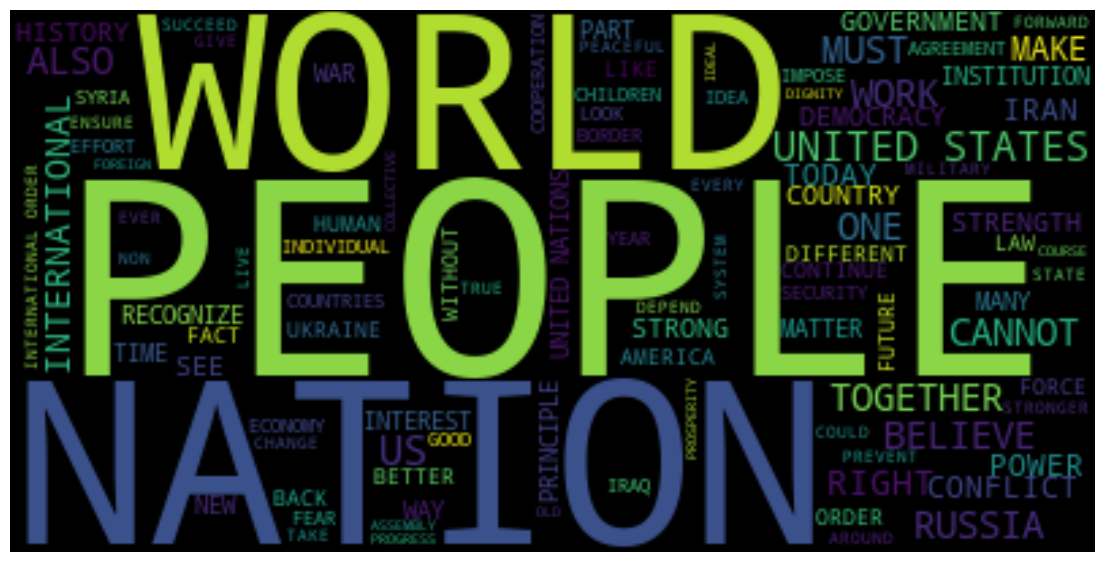

In [161]:
text = df.query("year==2015 and country=='USA'")['text'].values[0]

plt.figure(figsize=(14, 8))
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

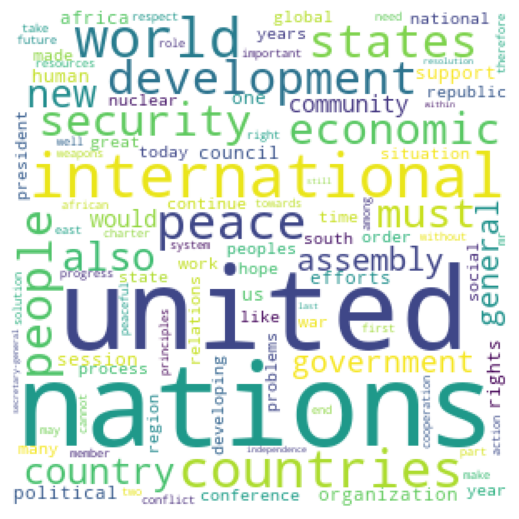

In [162]:
wc = WordCloud(background_color='white', width = 300, height=300, max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### end of the code